In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001018399"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001018399
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,ENTERPRISE BANCORP INC /MA/
Ticker,EBTC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,19.0,1.487737e+01,3.725020e+00,10.24,11.31,14.55,1.801500e+01,22.55
interest income,62.0,1.844115e+07,5.372473e+06,10649000.00,15663500.00,16758500.00,2.018425e+07,33297000.00
net income,78.0,3.052462e+06,1.597064e+06,29000.00,2182000.00,2623000.00,3.500500e+06,8696000.00
net interest income,78.0,1.464045e+07,5.472891e+06,8659000.00,10279000.00,12819000.00,1.739200e+07,28190000.00
provision for loan losses,78.0,6.293333e+05,5.117723e+05,-400000.00,273000.00,477500.00,1.045750e+06,1950000.00


# Plots

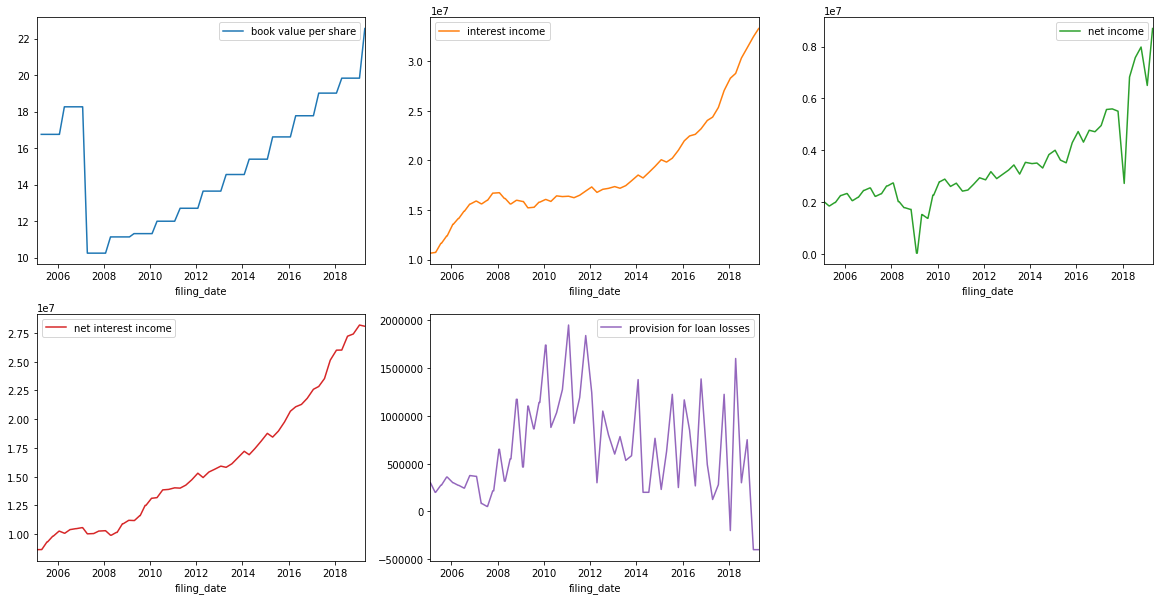

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                         
0001018399 book value per share                       2004Q4  missing   
           book value per share  2005Q2 to 2005Q4: 3 periods  missing   
           book value per share  2006Q2 to 2006Q4: 3 periods  missing   
           book value per share  2007Q2 to 2007Q4: 3 periods  missing   
           book value per share  2008Q2 to 2008Q4: 3 periods  missing   
           book value per share  2009Q2 to 2009Q4: 3 periods  missing   
           book value per share  2010Q2 to 2010Q4: 3 periods  missing   
           book value per share  2011Q2 to 2011Q4: 3 periods  missing   
           book value per share  2012Q2 to 2012Q4: 3 periods  missing   
           book value per share  2013Q2 to 2013Q4: 3 periods  missing   
           book value per share  2014Q2 to 2014Q4: 3 periods  missing   
           book value per share  2015Q2 to 2015Q4: 3 periods  missing   
           book value per share  2016Q2 to 2016Q4: 3 periods  missing   
           book value per share  2017Q2 to 2017Q4: 3 periods  missing   
           book value per share  2018Q2 to 2018Q4: 3 periods  missing   
           total revenue                                None    empty   

                                            message  
cik        item                                      
0001018399 book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           total revenue         No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()